# A Quick Introduction to Python 

**For Ocean Data Labs Development Workshop Participants**

*Written by Sage Lichtenwalner, Rutgers University, February 25, 2019*

Welcome to Python!  In this example notebook, we will demonstrate how you can quickly get started programming in Python, using Google's cool [Colaboratory](https://colab.research.google.com) environment. Colab is basically a free service that can run Python/Jupyter notebooks in the cloud.

In this notebook, we will:
* Quickly load some data
* Make some quick plots
* Calculate a few basic statistics
* Save the data to a new file you can download to use elsewhere

These are really all the basics you will need to know to take part in our upcoming Ocean Data Labs workshop. Of course, at the workshop we will go into more detail on how to do each of these steps, particularly when it comes to accessing, processing and plotting OOI datasets. 

But if you can run this notebook in your own Colab account, you'll be well on your way!

## Getting Started

Jupyter notebooks have two kids of cells.  "Markdown" cells, like this one which can contain formatted text, and "Code" cells, which contain the code you will run.

To execute the code in a cell, you can either:
* click the **Play** icon on the left
* type **Cmd (or Ctrl) + Enter** to run the cell in place 
* or type **Shift + Enter** to run the cell and move the focus to the next cell.

You can try all these options on our first, very elaborate piece of code in the next cell.

After you execute the cell, the result will automatically display underneath the cell.

In [0]:
2+2

4

In [0]:
# We can eailsy assign variables, just like in other languages
x = 8
y = 2.5

In [0]:
# And we can do some basic math
print(x + y)
print(x/y)

NameError: ignored

**A note about print()**

* By default, a Colab/Jupyter notebook will print out the output from the last line, so you don't have to specify the `print()` command.  
* However, if we want to output the results from additional lines (as we did above), we need to use `print()` on each line.
* You can also suppress the output from the last line by adding a semi-colon `;` at the end.

## Loading Data

Okay, so now we know the basics of how to run code in a Jupyter notebook, let's dive in and load some data.  To do this, we will use the [pandas](https://pandas.pydata.org) data analysis library.  By default, python starts with a very limited environment, unlike Matlab and R which often include a lot of functionality right off the bat.  So, in order to use the functions available in pandas, we need to import the library into our workspace.  We only need to do this once.  It is also common to give a library a nickname or shortcut, in this case `pd`.

In [0]:
import pandas as pd

Now we'll load a simple CSV file from the web using the `read_csv()` function.  We will cover a few other ways of loading data at the workshop, including how to load your own CSV file as well as how to load OOI data files which are in NetCDF format.

In [0]:
url = 'https://marine.rutgers.edu/~sage/OOI_Data_Workshops/CP02PMUO_R9_ar24011.csv'
data = pd.read_csv(url)

Our data is now loaded in the variable `data`.  To see what we've loaded, we could simply print out the variable.  But pandas include the `.head()` function which nicely prints out the first 5 rows.  You could also use `.tail()` command to print out the last 5 rows.

In [0]:
data.head()

,Depth,Pressure,Temperature,Salinity,Density,Fluorescence,Turbidity,Oxygen
0,14,14.109,20.0267,34.7221,1521.47,0.0072,0.3726,34.7187
1,15,15.116,20.0913,34.7772,1521.73,-0.0245,0.3700,34.7693
2,16,16.124,20.2141,34.8684,1522.19,-0.0361,0.3785,34.8652
3,17,17.132,20.3139,34.9335,1522.55,-0.0401,0.3759,34.9386
4,18,18.140,20.4459,35.0250,1523.03,-0.0509,0.3744,35.0229


**Your Turn:** In the next cell, try replacing head() in the previous command with tail().  Also, you can try adding a parameter into both functions, to see what that does, for example try `data.head(9)`, or you could just type in `data` to see what that outputs.

In [0]:
# Your code here


### Extracting columns
Because our dataset has nicely named columns (which were included in the first line of the CSV file), if we want to subset out a single column, we can easily do so.

In [0]:
data['Depth'].head()

0    14
1    15
2    16
3    17
4    18
Name: Depth, dtype: int64

In [0]:
# Extract 2 columns, notice the double [[]]
data[['Depth','Temperature']].head()

,Depth,Temperature
0,14,20.0267
1,15,20.0913
2,16,20.2141
3,17,20.3139
4,18,20.4459


## Quick Plots
Now that we have our data loaded into a pandas DataFrame, we can easily plot it.  This is because pandas includes many of the [matplotlib](https://matplotlib.org) plotting library's functions built in.

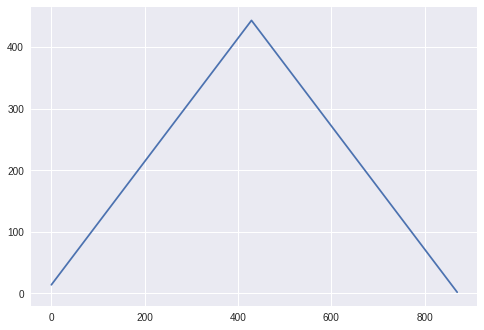

In [0]:
# Let's plot the depth column
data['Depth'].plot();

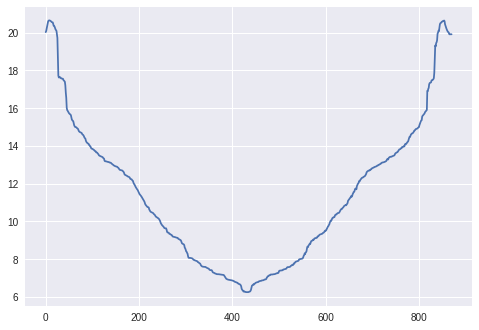

In [0]:
# Now let's plot temperature
data['Temperature'].plot();

Note that each of the above two plots used the "index" number of each measurement of the x-axis.  That's not that helpful unless we happen to know that each measurement was made regularly spaced in time and we happened to know what that is.  So let's make some more "oceanographic" plots instead.

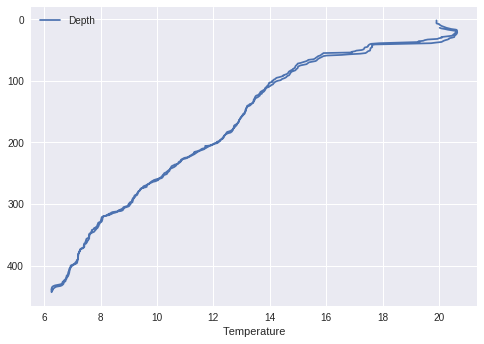

In [0]:
# Temperature vs. Depth
ax = data.plot(x='Temperature',y='Depth');
ax.invert_yaxis(); # Flip the y-axis

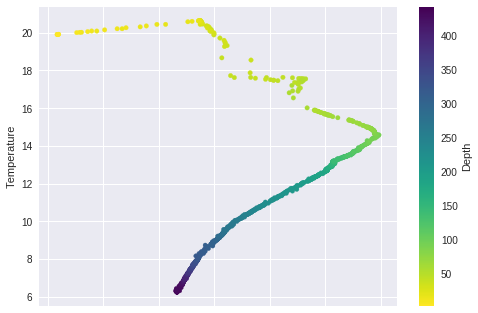

In [0]:
# Let's go crazy!
data.plot.scatter(x='Salinity', y='Temperature', c='Depth', cmap='viridis_r');

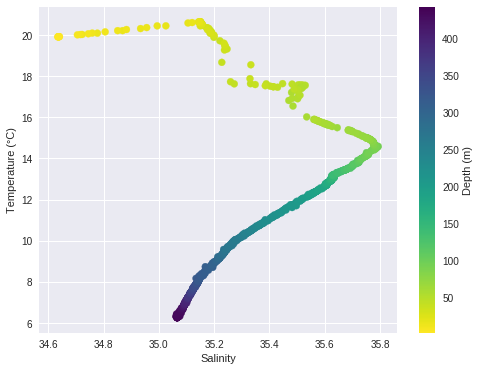

In [0]:
# But there's a bug and the x-axis is missing. Ah python.  
# So let's do it the old fashined way using matplotlib directly...

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(data=data,x='Salinity', y='Temperature', c='Depth', cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')
cbh = plt.colorbar();
cbh.set_label('Depth (m)')

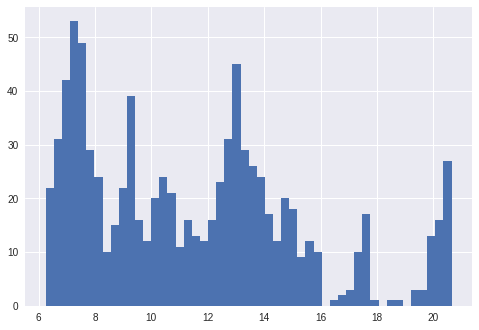

In [0]:
# We can also easily create histograms
data['Temperature'].hist(bins=50);

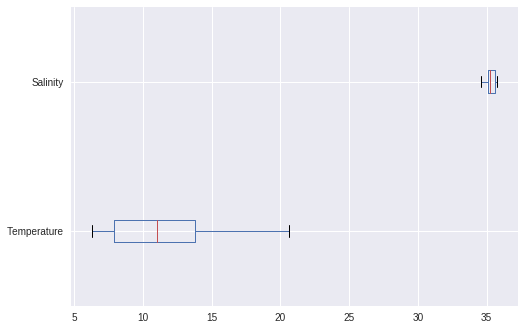

In [0]:
# And boxplots
data[['Temperature','Salinity']].plot.box(vert=False);

We've barely begun to scratch the surface of python's plotting capabilities.  There are also a number of libraries that can create interactive data visualization tools.  Here's a quick example using [Altair](https://altair-viz.github.io/index.html).

In [0]:
import altair as alt

alt.Chart(data).mark_circle(size=60).encode(
    alt.X('Salinity',
          scale=alt.Scale(zero=False)
    ),
    alt.Y('Temperature',
          scale=alt.Scale(zero=False)
    ),
    color='Depth',
    tooltip=['Salinity', 'Temperature', 'Depth']
).interactive()

Chart({
  data:      Depth  Pressure  Temperature  Salinity  Density  Fluorescence  Turbidity  \
  0       14    14.109      20.0267   34.7221  1521.47        0.0072     0.3726   
  1       15    15.116      20.0913   34.7772  1521.73       -0.0245     0.3700   
  2       16    16.124      20.2141   34.8684  1522.19       -0.0361     0.3785   
  3       17    17.132      20.3139   34.9335  1522.55       -0.0401     0.3759   
  4       18    18.140      20.4459   35.0250  1523.03       -0.0509     0.3744   
  5       19    19.147      20.5841   35.1051  1523.52       -0.0472     0.3726   
  6       20    20.155      20.6339   35.1430  1523.71       -0.0761     0.3652   
  7       21    21.163      20.6473   35.1498  1523.77       -0.0597     0.3673   
  8       22    22.171      20.6480   35.1497  1523.79       -0.0496     0.3669   
  9       23    23.179      20.6373   35.1503  1523.78       -0.0397     0.3677   
  10      24    24.187      20.6266   35.1498  1523.77       -0.0371     0.3652   
  11      25    25.194      20.6071   35.1513  1523.73       -0.0227     0.3677   
  12      26    26.202      20.5800   35.1529  1523.68       -0.0169     0.3637   
  13      27    27.210      20.5561   35.1547  1523.63       -0.0091     0.3629   
  14      28    28.218      20.5496   35.1553  1523.63       -0.0023     0.3629   
  15      29    29.226      20.5433   35.1548  1523.63       -0.0017     0.3670   
  16      30    30.234      20.4647   35.1583  1523.43        0.0129     0.3646   
  17      31    31.242      20.3632   35.1713  1523.19        0.0604     0.3669   
  18      32    32.249      20.3577   35.1751  1523.19        0.1161     0.3681   
  19      33    33.257      20.3123   35.1810  1523.09        0.1599     0.3739   
  20      34    34.265      20.2343   35.1838  1522.90        0.1138     0.3717   
  21      35    35.273      20.1721   35.1891  1522.75        0.1367     0.3658   
  22      36    36.281      20.1306   35.1895  1522.65        0.1537     0.3656   
  23      37    37.289      20.0924   35.1849  1522.56        0.1532     0.3718   
  24      38    38.297      19.8872   35.1988  1522.02        0.1532     0.3683   
  25      39    39.305      19.7207   35.2206  1521.60        0.1529     0.3678   
  26      40    40.313      18.6712   35.2274  1518.65        0.2316     0.3701   
  27      41    41.320      17.7283   35.2590  1515.98        0.2491     0.3682   
  28      42    42.328      17.6242   35.2725  1515.70        0.2217     0.3678   
  29      43    43.336      17.6337   35.3313  1515.81        0.1934     0.3706   
  ..     ...       ...          ...       ...      ...           ...        ...   
  841     31    31.242      20.0003   35.1987  1522.22        0.1076     0.3689   
  842     30    30.234      20.1049   35.1874  1522.48        0.1312     0.3708   
  843     29    29.226      20.0872   35.1882  1522.41        0.1004     0.3714   
  844     28    28.218      20.2550   35.1757  1522.85        0.0614     0.3689   
  845     27    27.210      20.4448   35.1495  1523.32        0.0482     0.3715   
  846     26    26.202      20.5025   35.1546  1523.47        0.0210     0.3707   
  847     25    25.194      20.5103   35.1550  1523.47       -0.0234     0.3719   
  848     24    24.187      20.5428   35.1553  1523.54       -0.0078     0.3747   
  849     23    23.179      20.5743   35.1505  1523.61       -0.0147     0.3681   
  850     22    22.171      20.5818   35.1507  1523.61       -0.0659     0.3715   
  851     21    21.163      20.6113   35.1487  1523.67       -0.0746     0.3709   
  852     20    20.155      20.6170   35.1449  1523.67       -0.0510     0.3775   
  853     19    19.147      20.6225   35.1464  1523.67       -0.0842     0.3751   
  854     18    18.140      20.6433   35.1449  1523.70       -0.0910     0.3740   
  855     17    17.132      20.6061   35.1202  1523.56       -0.0917     0.3762   
  856     16    16.124      20.4442   34.9937  1522.96       -0.1008     0.3728   
  

**Your Turn:** Try adapting the the line or scatterplot code above to plot profiles or comparisons of other variables.  For example:
* Turbidity vs. Depth
* Oxygen vs. Depth
* Oxygen vs. Temperature

In [0]:
# Your code here


## Some Basic Statistics
The pandas library comes with a number of standard statistical functions built in.  But one really neat function is `.describe()` which quickly outputs many of the most common stats for every variable in the DataFrame.

In [0]:
data.describe()

,Depth,Pressure,Temperature,Salinity,Density,Fluorescence,Turbidity,Oxygen
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,225.208955,227.110232,11.493936,35.353968,1498.607773,-0.259318,0.361451,35.350359
std,125.862021,126.972414,3.870060,0.255037,11.098248,0.159814,0.027444,0.254881
min,2.000000,2.015000,6.252900,34.634200,1483.100000,-0.375900,0.328600,34.630800
25%,116.500000,117.432000,7.907650,35.123850,1487.855000,-0.335200,0.346150,35.120850
50%,225.000000,226.861000,11.021400,35.288300,1497.670000,-0.335000,0.352200,35.285600
75%,334.000000,336.851000,13.775450,35.607250,1505.530000,-0.296100,0.367750,35.603200
max,443.000000,446.900000,20.648000,35.793200,1523.790000,0.327700,0.501700,35.790500


In [0]:
# Or we could output these individually
round(data['Temperature'].mean(),4)

11.4939

**Your Turn:** Try adapting the line above to output other statistics from other variables.

In [0]:
# Your code here


## Exporting a Data File
Finally, let's do a quick demonstration of how you can save some data to a file so you can import it into another program, like Excel or Matlab for more analysis.



In [0]:
data.describe().to_csv('ctd_summary.csv');

We can use the unix `ls` command to list the files in the current directory to see if the CSV file we just created was saved.  

In Colab, you can also check out the Files tab in the left sidebar.

In [0]:
!ls -l

total 8
-rw-r--r-- 1 root root  797 Feb 26 06:47 ctd_summary.csv
drwxr-xr-x 1 root root 4096 Feb 19 17:17 sample_data


Finally, let's download the file to our browser, so we can then open it in Excel.

In [0]:
from google.colab import files

files.download('ctd_summary.csv')

## Summary

So that's the quick intro.  As you can see, with Python, you can easily load in data from a variety of different formats, quickly make some plots, calculate some statistics, and output the data in a variety of formats so you can continue to use it elsewhere if you like.

At the workshop, we will expand on these concepts to pull data from the OOI so we can analyze and use it.  The details may be a little more complicated, but in the end, you won't need to know a lot about programming to achieve our goals for the workshop. We'll have a number of examples that you (and your students) can play with to pull and plot data.

If you can can run this notebook, you'll be well on your way.  And if you run into any issues or have questions, please don't hesitate to reach out.

*-Sage Lichtenwalner*

If you are interested in seeing some additional examples of the plotting features available in python, I encourage you to visit the following pages: 

* [Matplotlib Examples](https://matplotlib.org/gallery/index.html)
* [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
* [Altair Example Gallery](https://altair-viz.github.io/gallery/index.html)
* [Python Graph Gallery](https://python-graph-gallery.com) 